In [1]:
import os
import shutil#
os.chdir('/content')
! git clone --branch errors https://github.com/mwl10/hetvae
os.chdir('/content/hetvae')
! pip install -r requirements.txt
os.chdir('/content/hetvae/src')
import numpy as np
import torch
import torch.optim as optim
import models
from argparse import Namespace
import torch.optim as optim
import utils
import my_utils
import pandas as pd
import importlib
import time
import vae_models
from glob import glob
import matplotlib.pyplot as plt
import sys
from dataset import DataSet
%matplotlib inline

Cloning into 'hetvae'...
remote: Enumerating objects: 4007, done.
remote: Counting objects: 100% (1043/1043), done.
remote: Compressing objects: 100% (870/870), done.
remote: Total 4007 (delta 226), reused 272 (delta 173), pack-reused 2964
Receiving objects: 100% (4007/4007), 42.47 MiB | 19.03 MiB/s, done.
Resolving deltas: 100% (1171/1171), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 13.5 MB/s 
     |████████████████████████████████| 81 kB 10.1 MB/s 
     |████████████████████████████████| 149 kB 58.2 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 15.7 MB 63.6 MB/s 
     |████████████████████████████████| 308 kB 56.9 MB/s 
     |████████████████████████████████| 112 kB 53.9 MB/s 
     |████████████████████████████████| 2.1 MB 53.2 MB/s 
     |████████████████████████████████| 596 kB 61.2 MB/s 
     |█████████████████████████

4
dims of /content/hetvae/data/KOSHIDA/NGC5548_V.dat:	(301, 3)
dims of /content/hetvae/data/KOSHIDA/NGC4593_K.dat:	(36, 3)
dims of /content/hetvae/data/KOSHIDA/NGC4593_V.dat:	(34, 3)
dims of /content/hetvae/data/KOSHIDA/NGC5548_K.dat:	(310, 3)
301
1.8854936624484793
36
6.473375169203042
34
0.8409240338053887
310
8.838199955412684
generating 20 new sample of each example in the dataset & appending them 
 old dataset length: 4
new dataset length: 84
created union_x attribute of length 362
zero fill all the examples up to the length of longest one given, dataset is also now a numpy array w shape: (84, 310, 3), instead of a list of numpy arrays


/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


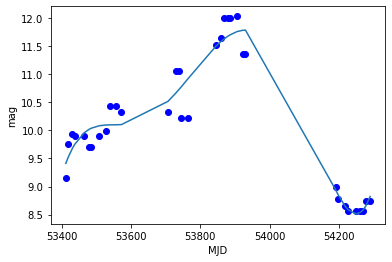

In [68]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Edelson data 
#--------------------------------------------------------------------------------------------------------
lc_files = glob('/content/hetvae/data/KOSHIDA/*')

# hypers: 
Edelson = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy(minimum=25) \
            .handle_dups() \
            .prune_graham(plot=True, index=2) \
            .resample_dataset(num_samples=20) \
            .normalize(normalize_x = 'no', x_by_range=False) \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight()

# hypers: 
Edelson.dataset = Edelson.dataset[2:3,:,:]
# plt.scatter(Edelson.dataset[1,:-100,0], Edelson.dataset[1,:-100,1])
# Edelson.union_x.shape

50
dims of /content/hetvae/data/CAT/CSS/CSS170320:110636+193253_20.34.dat:	(271, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170925:235758-120558_18.32.dat:	(320, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170321:125647+452323_19.55.dat:	(591, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170928:220238+103029_18.65.dat:	(476, 3)
dims of /content/hetvae/data/CAT/CSS/CSS171011:010004-132449_19.01.dat:	(302, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170318:140157+452716_19.29.dat:	(591, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170131:135357-074301_19.9.dat:	(282, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170323:083128+192242_19.0.dat:	(576, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170924:000329+142215_19.13.dat:	(141, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170930:072702+525141_18.55.dat:	(908, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170626:144534+461748_20.55.dat:	(332, 3)
dims of /content/hetvae/data/CAT/CSS/CSS170202:100034+455823_19.25.dat:	(253, 3)
dims of /content/hetvae/dat

/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


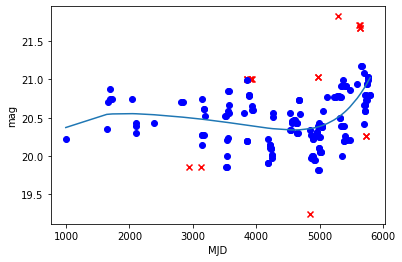

In [40]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Catalina data 
#--------------------------------------------------------------------------------------------------------
lc_files = glob('/content/hetvae/data/CAT/*/*')[:50]


Catalina = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups() \
            .prune_graham(plot=True, index=10, std_threshold=1) \
            .resample_dataset(num_samples=20) \
            .normalize(normalize_x = 'no', x_by_range=False) \
            .reorder() \
            .set_union_x() \
            .zero_fill() \
            .error_to_sample_weight()


Catalina.dataset= Catalina.dataset[18:19, :, :]
print(Catalina.dataset.shape)
# hypers: 


# plt.scatter(Catalina.dataset[1,:-100,0], Catalina.dataset[1,:-100,1])
# Catalina.union_x.shape

621
0.5096901962886006
585
0.7238968017976714
598
0.6490217293408855
82
0.3811101800439146
570
0.7443010199958523
created union_x attribute of length 2438
zero fill all the examples up to the length of longest one given, dataset is also now a numpy array w shape: (5, 619, 3), instead of a list of numpy arrays


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RankWarning: Polyfit may be poorly conditioned
/content/hetvae/src/dataset.py:328: RuntimeWarning: divide by zero encountered in true_divide
  self.dataset[:,:,2] = 1. / self.dataset[:,:,2]


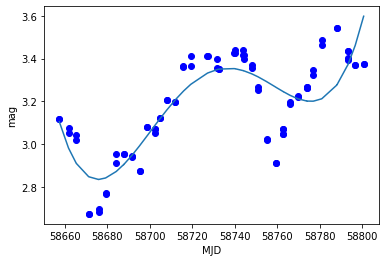

In [134]:
#------------------------------
# AGN Preprocessing, we have a DF w/ OBJECT , FILTER, MJD, FLUX, ERROR
#------------------------------

agn_df = pd.read_csv('/content/hetvae/data/AGN_1H2106-099/1H2106-099_latest_lcs_pyroa.csv')
# handle formatting for new AGN
lcs = []
for lc_df in agn_df.groupby('Filter'):
    lc = lc_df[1][['MJD', 'Flux', 'Error']].to_numpy()
    lcs.append(lc)
# lcs[0] = lcs[0][lcs[0][:,0].argsort()]
# lcs[0] = np.concatenate((lcs[0][:10], lcs[0][410:]))

# lcs = [lcs[0], lcs[0]]
AGN_1H2106 = DataSet()
AGN_1H2106.dataset = lcs # skip add files part
AGN_1H2106 = AGN_1H2106.handle_dups() \
                      .prune_graham(plot=True, index=3) \
                      .normalize(normalize_y='individual', normalize_x='', x_by_range=False, y_by_range=False) \
                      .reorder() \
                      .set_union_x() \
                      .zero_fill() \
                      .error_to_sample_weight() \
                      .set_target_x()

AGN_1H2106.dataset = AGN_1H2106.dataset[0:1, :,:]

In [53]:
Edelson.x_mean_std[0]

array([5.199556e+04, 1.000000e+00])

In [135]:
args = Namespace(batch_size=8, bound_variance=False, const_var=False,dropout=0.19462264721791603, 
                 elbo_weight=4.108914123847402, embed_time=64, enc_num_heads=4, intensity=True, k_iwae=1, kl_annealing=False, 
                 kl_zero=False, latent_dim=8, lr=0.001, mixing='concat_and_mix', mse_weight=4.060280688730988, net='hetvae', 
                 niters=1000, norm=True, normalize_input='znorm', num_ref_points=32, rec_hidden=32, recon_loss=False, 
                 sample_tp=0.4733820088130086, save=True, seed=0, shuffle=True, std=0.1, var_per_dim=False, width=64)



In [136]:
DIM = 1
# definitly want a decaying error rate...
#scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[], gamma=0.1)
seed = args.seed
torch.manual_seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [137]:
LightCurves = AGN_1H2106.dataset
#np.concatenate((AGN_1H2106.dataset, AGN_1H2106.subsampled_mask[:,:,np.newaxis], AGN_1H2106.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 
#LightCurves = np.concatenate((AGN_1H2106.dataset, AGN_1H2106.subsampled_mask[:,:,np.newaxis], AGN_1H2106.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 
#LightCurves = np.concatenate((Catalina.dataset, Catalina.subsampled_mask[:,:,np.newaxis], Catalina.recon_mask[:,:,np.newaxis]), axis=-1) # format the masks for the model 

print(LightCurves.shape)


(1, 619, 3)


In [138]:
training, valid = np.split(LightCurves, [int(np.floor(1*len(LightCurves)))])# shuffle?

train_loader = torch.utils.data.DataLoader(training, batch_size=args.batch_size)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=args.batch_size)
       

In [189]:
net = models.load_network(args, DIM, torch.Tensor(AGN_1H2106.union_x))
#net = models.load_network(args, DIM, torch.Tensor(Edelson.union_x))  
params = list(net.parameters())
optimizer = optim.Adam(params, lr=0.003572758547163779)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, gamma=0.5, step_size=150)

In [106]:
for g in optimizer.param_groups:
    print(g['lr'])
    g['lr'] = 0.001463275753032352

3.4890220187146277e-06


In [190]:
AGN_1H2106.set_target_x(num_points=250)
recons = []
end_times = []
nlls = []
mses = []
epochs = []
lrs = []

In [191]:
start = time.time()

for epoch in range(1, 1001): #args.niters + 1):
    nll, mse = my_utils.train(net, optimizer, epoch, train_loader, args, errors=False)
    scheduler.step() 
    lrs.append(optimizer.param_groups[0]["lr"])
    if epoch % 1 == 0 or epoch == 1:
        epochs.append(epoch)
        nlls.append(nll)
        mses.append(mse)
        end = time.time()
        end_times.append(end)
        reconstruction, qz_mean, qz_std = viz_per_example(AGN_1H2106.dataset[0], AGN_1H2106.target_x[0], net, num_points=250, device=device, k_iwae=50)
        recons.append(reconstruction)

Iter: 100, train loss: 0.2028, avg nll: -0.0244, avg kl: 0.1511, mse: 0.059392, mae: 0.154065
Iter: 200, train loss: -2.6707, avg nll: -0.7152, avg kl: 0.2693, mse: 0.038703, mae: 0.103305
Iter: 300, train loss: -1.9213, avg nll: -0.5399, avg kl: 0.3297, mse: 0.039856, mae: 0.109702
Iter: 400, train loss: -4.0592, avg nll: -1.0569, avg kl: 0.3417, mse: 0.035217, mae: 0.089232
Iter: 500, train loss: -4.7793, avg nll: -1.2306, avg kl: 0.3436, mse: 0.033530, mae: 0.080552
Iter: 600, train loss: -4.6842, avg nll: -1.2079, avg kl: 0.3478, mse: 0.033546, mae: 0.083503
Iter: 700, train loss: -4.8844, avg nll: -1.2583, avg kl: 0.3562, mse: 0.034359, mae: 0.081184
Iter: 800, train loss: -5.1172, avg nll: -1.3133, avg kl: 0.3581, mse: 0.032452, mae: 0.077254
Iter: 900, train loss: -5.0025, avg nll: -1.2855, avg kl: 0.3644, mse: 0.031954, mae: 0.079301
Iter: 1000, train loss: -5.0156, avg nll: -1.2901, avg kl: 0.3647, mse: 0.033388, mae: 0.079276


In [ ]:
Edelson.target_x[0]

In [147]:
AGN_1H2106.error_to_sample_weight()
AGN_1H2106.dataset[0,:10,2]

array([0.09576505, 0.09576505, 0.07400027, 0.08705914, 0.07835323,
       0.06964731, 0.07400027, 0.07400027, 0.07400027, 0.06964731],
      dtype=float32)

In [185]:
elapsed = [f'{round((end - start),3)}' for end in end_times]
mses = [round(float(mse), 3) for mse in mses]
nlls = [round(float(nll), 3) for nll in nlls]
elapsed.insert(0,'0')
print(elapsed, mses, nlls)

['0', '0.018', '0.05', '0.081', '0.112', '0.143', '0.175', '0.206', '0.237', '0.268', '0.299', '0.33', '0.361', '0.393', '0.427', '0.459', '0.49', '0.521', '0.555', '0.587', '0.619', '0.65', '0.683', '0.716', '0.746', '0.778', '0.812', '0.844', '0.875', '0.906', '0.937', '0.968', '0.999', '1.03', '1.061', '1.092', '1.124', '1.155', '1.186', '1.217', '1.247', '1.278', '1.309', '1.34', '1.371', '1.401', '1.434', '1.466', '1.498', '1.53', '1.562', '1.595', '1.626', '1.657', '1.688', '1.718', '1.751', '1.785', '1.816', '1.847', '1.878', '1.909', '1.94', '1.982', '2.022', '2.056', '2.088', '2.119', '2.151', '2.183', '2.215', '2.247', '2.281', '2.313', '2.35', '2.382', '2.414', '2.446', '2.479', '2.511', '2.543', '2.576', '2.608', '2.64', '2.672', '2.703', '2.735', '2.767', '2.798', '2.83', '2.86', '2.891', '2.922', '2.953', '2.988', '3.021', '3.051', '3.082', '3.113', '3.144', '3.178', '3.209', '3.239', '3.27', '3.301', '3.331', '3.362', '3.395', '3.427', '3.458', '3.49', '3.522', '3.555', 

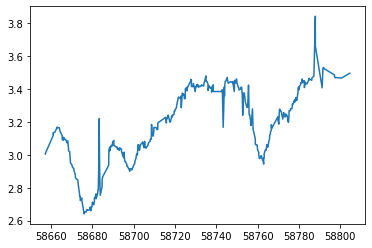

In [186]:
# denormalize reconstructions and the example we're going to animate

i = 0
xmean, xstd = AGN_1H2106.x_mean_std[3]
ymean, ystd = AGN_1H2106.y_mean_std[3]

denorm_recons = []

for recon in recons:
    denorm_recon = recon.copy()
    denorm_recon[:,0] = (denorm_recon[:,0]) + xmean
    denorm_recon[:,1] = (denorm_recon[:,1] * ystd) + ymean
    denorm_recon[:,2] = denorm_recon[:,2] * ystd
    denorm_recons.append(denorm_recon)


ex= AGN_1H2106.dataset[i].copy()

ex[:,0] = (ex[:,0]) + xmean
ex[:,1] = (ex[:,1]) * ystd + ymean
ex[:,2] = ex[:,2] * ystd

plt.plot(ex[:,0], ex[:,1])
# plt.plot(recons[0][:,0], recons[0][:,1])

-0.006839158009961447

In [161]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

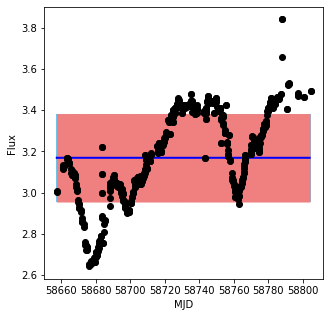

In [187]:
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(5)
def animate(i):
    x = denorm_recons[i][:,0]
    y = denorm_recons[i][:,1]
    yerr = denorm_recons[i][:,2]

    ax.clear()
    w=2.0
    ax.fill_between(x, y - yerr, y+yerr, color='lightcoral', zorder=30)
    ax.plot(x, y, c='b', lw=w, label='Reconstructions', zorder=40)
    ax.scatter(ex[:,0], ex[:,1], c='black', zorder=50)
    ax.errorbar(x, y ,yerr=yerr,  ecolor='#65c9f7', c='b', lw=w, label='Reconstructions')
    #ax.text(57585, 1, f'epoch: {epochs[i]}, mse: {mses[i]}, \n nll: {nlls[i]}, elapsed time: {elapsed[i]} sec', fontsize=10)
    #ax.set_xlim([58670,58700])
    #ax.set_ylim([2.8,3.2])
    ax.set_xlabel('MJD')
    ax.set_ylabel('Flux')
    #ax.set_title()
    

ani = FuncAnimation(fig, animate, frames=100, interval=100, repeat=False)

In [188]:
ani

In [141]:
# visualisation for one light curve w/ increasing number of points
def viz_per_example(example, target_x, net, num_points=40, device="cuda", k_iwae=10, frac=1): 
    example = example[np.newaxis, :,:]
    target_x = target_x[np.newaxis, :, np.newaxis]
    np.random.seed(0)
    with torch.no_grad(): 
        # if torch.is_tensor(example):
        #     example = example.cpu().numpy()
        example = torch.tensor(example)
        # make new masks relative to fraction of points we got to predict w/ 
        subsampled_mask, recon_mask = my_utils.make_masks(example, frac=frac)
        #example = np.concatenate((example, smask[:,:,np.newaxis], rmask[:,:,np.newaxis], target_x), axis=-1) # format the masks 
        example = torch.cat((example, torch.unsqueeze(subsampled_mask, 2), torch.unsqueeze(recon_mask, 2), torch.tensor(target_x)), axis=-1)

        #example = torch.tensor(example)
        example = example.to(device)
        
        subsampled_mask = example[:,:,3:4]
        context_y = torch.cat((example[:,:, 1:2] * subsampled_mask, subsampled_mask), -1)
        px, qz = net.get_reconstruction(example[:,:, 0], context_y, example[:,:,5], num_samples=k_iwae)

        qz_mean = (qz.mean.cpu().numpy())
        qz_std = (torch.exp(0.5 * qz.logvar).cpu().numpy())
        px_mean = px.mean.cpu().numpy()
        px_std = torch.exp(0.5 * px.logvar).cpu().numpy()
        example = example.cpu().numpy()

        px_mean = np.mean(px_mean, axis=0)[0,:num_points,0]
        px_std = np.mean(px_std, axis=0)[0,:num_points,0]
        target_x = target_x[0,:num_points,0]
        w=2.0
        #plt.figure(figsize=(30, 10))
        #plt.fill_between(target_x, px_mean - 2*px_std, px_mean+2*px_std, color='gray')

        # plt.plot(target_x, px_mean, c='b', lw=w, label='Reconstructions', zorder=20)
        # plt.scatter(example[0,:,0], example[0,:,1])
        # plt.errorbar(target_x, px_mean ,yerr=px_std,  ecolor='#65c9f7', c='b', lw=w, label='Reconstructions')

        #plt.show()
        reconstruction = np.concatenate((target_x[:,np.newaxis], px_mean[:,np.newaxis], px_std[:,np.newaxis]), axis=1)
        #print(f'qz shape: {qz_mean.shape}')
        #print(f'reconstructed example: {reconstruction.shape}')
        return reconstruction, qz_mean,qz_std

